In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib

In [50]:
# Load and preprocess data
df = pd.read_csv('SCMS_Delivery_History_Dataset_20150929.csv', encoding='latin-1')


In [51]:
# Display the first few rows
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,CÃ´te d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,CÃ´te d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [52]:
# Check for missing values
print(df.isnull().sum())

# Basic statistical summary
df.describe()

ID                                0
Project Code                      0
PQ #                              0
PO / SO #                         0
ASN/DN #                          0
Country                           0
Managed By                        0
Fulfill Via                       0
Vendor INCO Term                  0
Shipment Mode                    48
PQ First Sent to Client Date      0
PO Sent to Vendor Date            0
Scheduled Delivery Date           0
Delivered to Client Date          0
Delivery Recorded Date            0
Product Group                     0
Sub Classification                0
Vendor                            0
Item Description                  0
Molecule/Test Type                0
Brand                             0
Dosage                          378
Dosage Form                       0
Unit of Measure (Per Pack)        0
Line Item Quantity                0
Line Item Value                   0
Pack Price                        0
Unit Price                  

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,881.000000
mean,5022.059059,89.540541,4201.242242,6.665020e+04,40.891882,1.133223,112.976356
std,3013.573425,99.942760,10482.205298,1.527963e+05,67.561012,3.448177,279.501862
min,1.000000,1.000000,1.000000,7.000000e-01,0.010000,0.000000,0.000000
25%,2450.500000,30.000000,120.000000,1.849700e+03,7.000000,0.090000,2.920000
50%,5047.000000,60.000000,800.000000,1.318000e+04,20.000000,0.340000,20.500000
75%,7718.500000,100.000000,3510.000000,6.804925e+04,41.980000,0.800000,113.660000
max,10366.000000,1000.000000,100000.000000,2.520000e+06,700.000000,37.500000,4939.200000


In [53]:
# Identify the target variable (assuming it's related to cost or price)
potential_targets = [col for col in df.columns if 'cost' in col.lower() or 'price' in col.lower()]
if not potential_targets:
    raise ValueError("No suitable target variable found. Please specify the target variable manually.")
target_variable = potential_targets[0]
print(f"Selected target variable: {target_variable}")


Selected target variable: Pack Price


In [54]:
# Handle missing values for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [55]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns


In [56]:
# List all columns to find actual categorical columns
print("All columns in the DataFrame:", df.columns)

All columns in the DataFrame: Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')


In [57]:
# Use actual categorical columns present in the DataFrame
categorical_columns = [col for col in categorical_columns if col in df.columns]


In [58]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [59]:
# Ensure all data is numeric
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Non-numeric column found: {column}")
        df[column] = df[column].astype('category').cat.codes


In [60]:
# Prepare the data for modeling
X = df.drop(target_variable, axis=1)
y = df[target_variable]

In [61]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Train and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, R2: {r2:.2f}')

Linear Regression - MSE: 8982247877683663354720157696.00, R2: -2407369099575283987513344.00
Decision Tree - MSE: 9.95, R2: 1.00
Random Forest - MSE: 13.45, R2: 1.00


In [64]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Random Forest - MSE: {mse:.2f}, R2: {r2:.2f}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest - MSE: 29.04, R2: 0.99


In [65]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance.head(10))

                                                feature  importance
2868  Item Description_HIV 1/2, OraQuick Advance HIV...    0.205569
2946  Molecule/Test Type_HIV 1/2, OraQuick Advance H...    0.204484
3105       Manufacturing Site_Pacific Biotech, Thailand    0.203493
4                                            Unit Price    0.121810
2996                                     Brand_OraQuick    0.088275
1                            Unit of Measure (Per Pack)    0.086670
2811                   Vendor_Orasure Technologies Inc.    0.021370
2937       Molecule/Test Type_HIV 1/2, Capillus HIV Kit    0.015632
2861  Item Description_HIV 1/2, Capillus HIV Kit, 10...    0.011325
2979                                     Brand_Capillus    0.006866


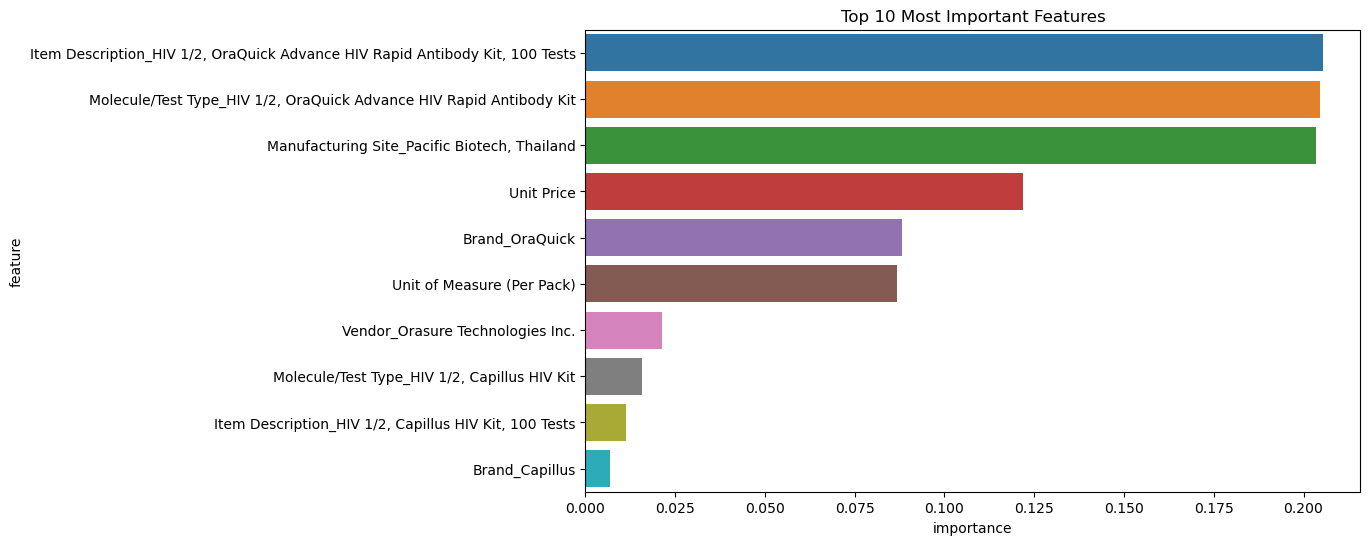

In [66]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

Data type of 'Freight Cost (USD)': float64
Number of valid entries: 512
Number of NaN values: 487


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


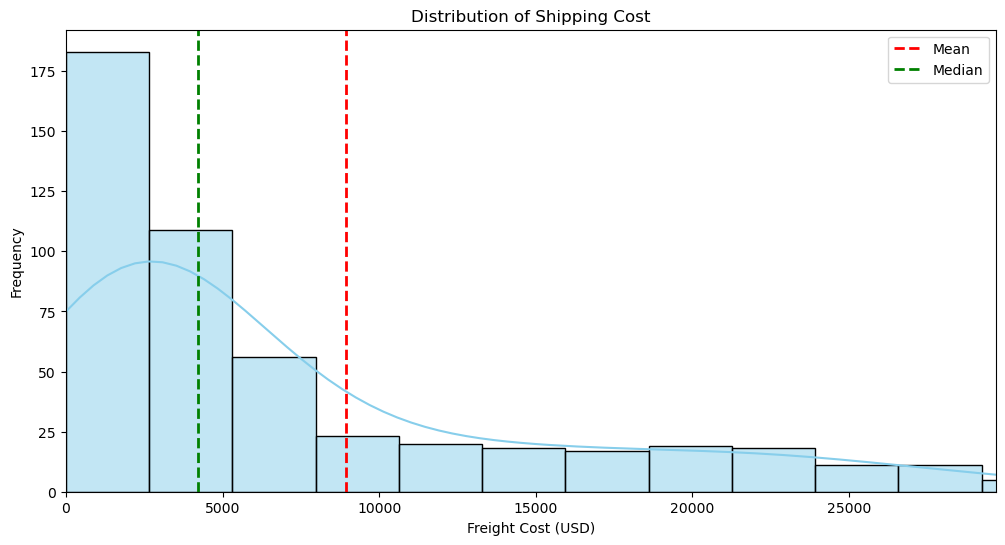

Mean Shipping Cost: $8943.45
Median Shipping Cost: $4209.91
Minimum Shipping Cost: $0.75
Maximum Shipping Cost: $87692.85
95th Percentile Shipping Cost: $29687.87


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('SCMS_Delivery_History_Dataset_20150929.csv', encoding='latin-1')

# Check if 'Freight Cost (USD)' column exists
if 'Freight Cost (USD)' in df.columns:
    freight_cost_column = 'Freight Cost (USD)'
else:
    # Try to find a similar column
    possible_columns = [col for col in df.columns if 'freight' in col.lower() and 'cost' in col.lower()]
    if possible_columns:
        freight_cost_column = possible_columns[0]
        print(f"Using '{freight_cost_column}' as the freight cost column.")
    else:
        print("No freight cost column found. Please check your dataset.")
        exit()

# Convert to numeric, replacing non-numeric values with NaN
df[freight_cost_column] = pd.to_numeric(df[freight_cost_column], errors='coerce')

# Remove NaN values for visualization
freight_cost = df[freight_cost_column].dropna()

if freight_cost.empty:
    print(f"No valid numeric data in '{freight_cost_column}'. Please check your data.")
    exit()

# Print data type and some basic stats
print(f"Data type of '{freight_cost_column}': {freight_cost.dtype}")
print(f"Number of valid entries: {len(freight_cost)}")
print(f"Number of NaN values: {df[freight_cost_column].isna().sum()}")

# Visualize the distribution of shipping cost
plt.figure(figsize=(12, 6))
sns.histplot(freight_cost, kde=True, color='skyblue')
plt.title('Distribution of Shipping Cost')
plt.xlabel(freight_cost_column)
plt.ylabel('Frequency')
plt.axvline(freight_cost.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(freight_cost.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()

# Optionally, limit the x-axis to exclude extreme outliers
upper_limit = freight_cost.quantile(0.95)
plt.xlim(0, upper_limit)

plt.show()

# Print some statistics
print(f"Mean Shipping Cost: ${freight_cost.mean():.2f}")
print(f"Median Shipping Cost: ${freight_cost.median():.2f}")
print(f"Minimum Shipping Cost: ${freight_cost.min():.2f}")
print(f"Maximum Shipping Cost: ${freight_cost.max():.2f}")
print(f"95th Percentile Shipping Cost: ${upper_limit:.2f}")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


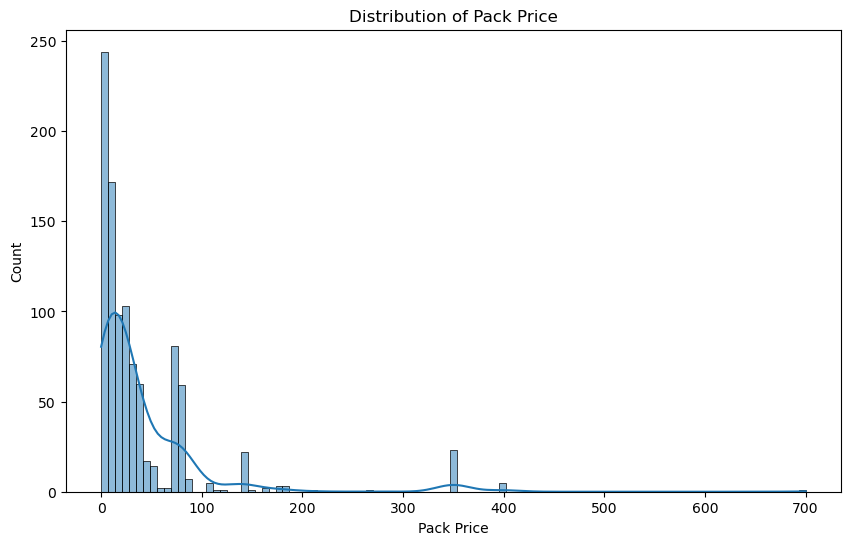

In [69]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df[target_variable], kde=True)
plt.title(f'Distribution of {target_variable}')
plt.show()

In [70]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [71]:
# Select relevant numeric columns (you may need to adjust this list based on your data)
relevant_columns = [col for col in numeric_columns if 'cost' in col.lower() or 'price' in col.lower() or 'quantity' in col.lower() or 'value' in col.lower() or 'weight' in col.lower()]


In [72]:
# If the list is too long, you can limit it to the top 5-7 columns
if len(relevant_columns) > 7:
    relevant_columns = relevant_columns[:7]

In [73]:
# Create a correlation matrix with these variables
corr_matrix = df[relevant_columns].corr()

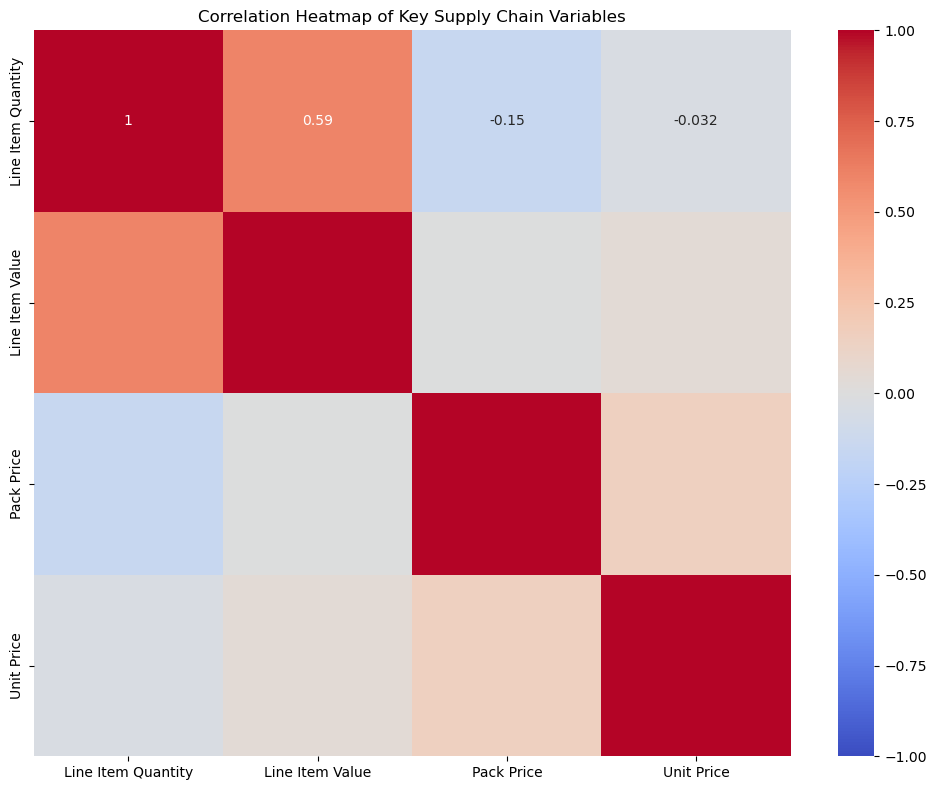

In [76]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Key Supply Chain Variables')
plt.tight_layout()
plt.show()

In [77]:
# Print the columns used
print("Columns used in the heatmap:", relevant_columns)

Columns used in the heatmap: ['Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price']


In [67]:
# Calculate Cost_Saving_Potential (as an example, we'll assume it's the difference between actual and predicted prices)
df['Predicted Price'] = best_rf.predict(scaler.transform(X))
df['Cost_Saving_Potential'] = df[target_variable] - df['Predicted Price']


In [46]:
# Save results to an Excel file
output_path = '/Users/ituaeriaye/Documents/Ironhack/Final-Project-DSML/DSML-Final-Project/1ST-Cost_Saving_Potential.xlsx'
df.to_excel(output_path, index=False)

print(f"Results saved to {output_path}")

Results saved to /Users/ituaeriaye/Documents/Ironhack/Final-Project-DSML/DSML-Final-Project/1ST-Cost_Saving_Potential.xlsx


In [79]:
# Checking skewness and kurtosis of the target variable
print(f'Skewness: {df[target_variable].skew()}')
print(f'Kurtosis: {df[target_variable].kurt()}')

Skewness: 4.053172930076907
Kurtosis: 20.767338430080223


In [ ]:
#RETRAINING THE MODEL TO MAKE PREDICTIONS WITH THE TOP 10 FEATURES 

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the original dataset
df = pd.read_csv('SCMS_Delivery_History_Dataset_20150929.csv', encoding='latin-1')

# Identify the target variable (assuming it's related to cost or price)
potential_targets = [col for col in df.columns if 'cost' in col.lower() or 'price' in col.lower()]
target_variable = potential_targets[0] if potential_targets else 'Pack Price'

# Prepare the data for modeling
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Encode categorical variables
X = pd.get_dummies(X)

# Save column names
joblib.dump(X.columns, 'training_columns.joblib')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Save the imputer
joblib.dump(imputer, 'imputer.joblib')

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

# Train and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, R2: {r2:.2f}')

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Random Forest - MSE: {mse:.2f}, R2: {r2:.2f}')

# Save the best model
joblib.dump(best_rf, 'best_rf_model.joblib')

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance.head(10)


Linear Regression - MSE: 7121388699542545856959873024.00, R2: -1908632597853041938399232.00
Decision Tree - MSE: 11.62, R2: 1.00
Random Forest - MSE: 16.00, R2: 1.00
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest - MSE: 31.40, R2: 0.99


,feature,importance
2886,"Item Description_HIV 1/2, OraQuick Advance HIV...",0.251068
3128,"Manufacturing Site_Pacific Biotech, Thailand",0.196479
2965,"Molecule/Test Type_HIV 1/2, OraQuick Advance H...",0.164342
4,Unit Price,0.122119
3016,Brand_OraQuick,0.093525
1,Unit of Measure (Per Pack),0.086526
2828,Vendor_Orasure Technologies Inc.,0.017771
2956,"Molecule/Test Type_HIV 1/2, Capillus HIV Kit",0.012233
2879,"Item Description_HIV 1/2, Capillus HIV Kit, 10...",0.012104
2999,Brand_Capillus,0.010148


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   6.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   6.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   4.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   7.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total 

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   5.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total 

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   6.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   6.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   5.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   7.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total 

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   5.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total 

In [ ]:
print(